Tiles []
Bounding box for intersections []
Loop through tiles and check if bounding boxes collide
List out to a file all of the bounding boxes for intersections that collide with tiles.

In [77]:
import geopandas as gpd
import json
import rasterio
from rasterio.warp import transform_bounds, calculate_default_transform, reproject
from osgeo import ogr, osr
import os
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

In [78]:
# Function to plot a polygon using matplotlib
def plot_polygon(polygon, title="Polygon", ax=None, color='blue'):
    if ax is None:
        fig, ax = plt.subplots()  # Create a new plot if no axis is provided
    x, y = polygon.exterior.xy    # Get the x and y coordinates of the polygon's exterior
    ax.plot(x, y, color=color)    # Plot the polygon
    ax.set_title(title)           # Set the title of the plot
    return ax

gdf has type: <class 'geopandas.geodataframe.GeoDataFrame'>


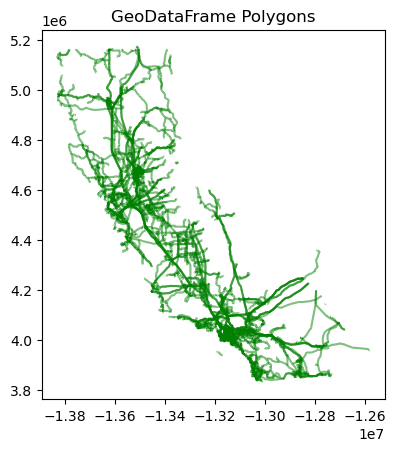

In [79]:
# Load the GeoJSON file
with open('./Transmission_Line_1604355110918241857.geojson') as f:
    data = json.load(f)

# Create a GeoDataFrame from the GeoJSON data
gdf = gpd.GeoDataFrame.from_features(data['features'], crs='EPSG:3857') 

                                                                            #print(f"gdf has type: {type(gdf)}")
# Ensure GeoDataFrame is in the target CRS
target_crs = 'EPSG:3857'
gdf = gdf.to_crs(target_crs)

# Plot the GeoDataFrame
fig, ax = plt.subplots()
gdf.plot(ax=ax, color='green', alpha=0.5)             # Plot the GeoDataFrame polygons in green
ax.set_title("GeoDataFrame Polygons")
plt.show()

# Obtain the bounding boxes of the Utilities
bounding_boxes = gdf.bounds

In [80]:
# Directory containing the .tif files
DATA_DIR = "./data/"
tif_folder = DATA_DIR + "B5/"

# List to store bounding boxes of tiles as OGR Geometry objects
tiles = []
                                                                        #print(f"tiles={len(tiles)}")
# Function to create OGR Geometry object from bounding box https://pcjericks.github.io/py-gdalogr-cookbook/geometry.html
def create_ogr_geometry(minx, miny, maxx, maxy):
    ring = ogr.Geometry(ogr.wkbLinearRing)
    ring.AddPoint(minx, miny)
    ring.AddPoint(maxx, miny)
    ring.AddPoint(maxx, maxy)
    ring.AddPoint(minx, maxy)
    ring.AddPoint(minx, miny)
    polygon = ogr.Geometry(ogr.wkbPolygon)
    polygon.AddGeometry(ring)
    return polygon

# Function to reproject raster bounds
def reproject_raster_bounds(src_bounds, src_crs, dst_crs):
    src_transform = osr.CoordinateTransformation(src_crs, dst_crs)   # Create a coordinate transformation object from the source CRS to the destination CRS
    minx, miny, maxx, maxy = src_bounds                              # Unpack the source bounds into individual coordinates
    minx, miny, _ = src_transform.TransformPoint(minx, miny)         # Transform the minimum x and y coordinates from the source CRS to the destination CRS
    maxx, maxy, _ = src_transform.TransformPoint(maxx, maxy)         # Transform the maximum x and y coordinates from the source CRS to the destination CRS
    return minx, miny, maxx, maxy                                    # Return the transformed coordinates as a bounding box in the destination CRS

tiles=0


Opening './data/B5/LC08_L2SP_039035_20240513_20240521_02_T1_SR_B5.TIF'...
minx=-12925087.069564981 miny=4159231.2705051065 maxx=-12637437.678343235 maxy=4453126.160186943
raster_box_ogr=POLYGON Z ((-12925087.069565 4159231.27050511 0,-12637437.6783432 4159231.27050511 0,-12637437.6783432 4453126.16018694 0,-12925087.069565 4453126.16018694 0,-12925087.069565 4159231.27050511 0))
tiles=1
POLYGON Z ((-12925087.069565 4159231.27050511 0,-12637437.6783432 4159231.27050511 0,-12637437.6783432 4453126.16018694 0,-12925087.069565 4453126.16018694 0,-12925087.069565 4159231.27050511 0)) 

Opening './data/B5/LC08_L2SP_039036_20240513_20240521_02_T1_SR_B5.TIF'...
minx=-12967785.805417467 miny=3966594.9042749256 maxx=-12686091.76228893 maxy=4254495.69518482
raster_box_ogr=POLYGON Z ((-12967785.8054175 3966594.90427493 0,-12686091.7622889 3966594.90427493 0,-12686091.7622889 4254495.69518482 0,-12967785.8054175 4254495.69518482 0,-12967785.8054175 3966594.90427493 0))
tiles=2
POLYGON Z ((-12967785

/tmp/ipykernel_124/1698225400.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()  # Create a new plot if no axis is provided


minx=-13361602.647256482 miny=4551577.064820966 maxx=-13055357.660625732 maxy=4863479.05059699
raster_box_ogr=POLYGON Z ((-13361602.6472565 4551577.06482097 0,-13055357.6606257 4551577.06482097 0,-13055357.6606257 4863479.05059699 0,-13361602.6472565 4863479.05059699 0,-13361602.6472565 4551577.06482097 0))
tiles=22
POLYGON Z ((-13361602.6472565 4551577.06482097 0,-13055357.6606257 4551577.06482097 0,-13055357.6606257 4863479.05059699 0,-13361602.6472565 4863479.05059699 0,-13361602.6472565 4551577.06482097 0)) 

Opening './data/B5/LC09_L2SP_042034_20240526_20240527_02_T1_SR_B5.TIF'...
minx=-13406119.803814476 miny=4351325.099308717 maxx=-13104321.627774324 maxy=4658718.053699904
raster_box_ogr=POLYGON Z ((-13406119.8038145 4351325.09930872 0,-13104321.6277743 4351325.09930872 0,-13104321.6277743 4658718.0536999 0,-13406119.8038145 4658718.0536999 0,-13406119.8038145 4351325.09930872 0))
tiles=23
POLYGON Z ((-13406119.8038145 4351325.09930872 0,-13104321.6277743 4351325.09930872 0,-131

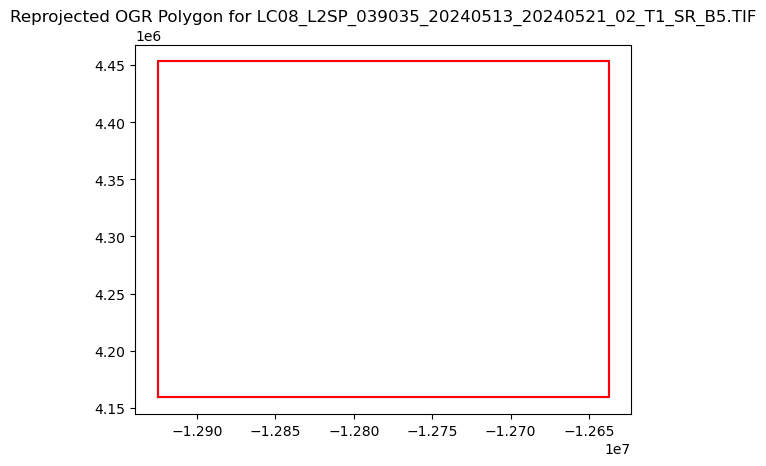

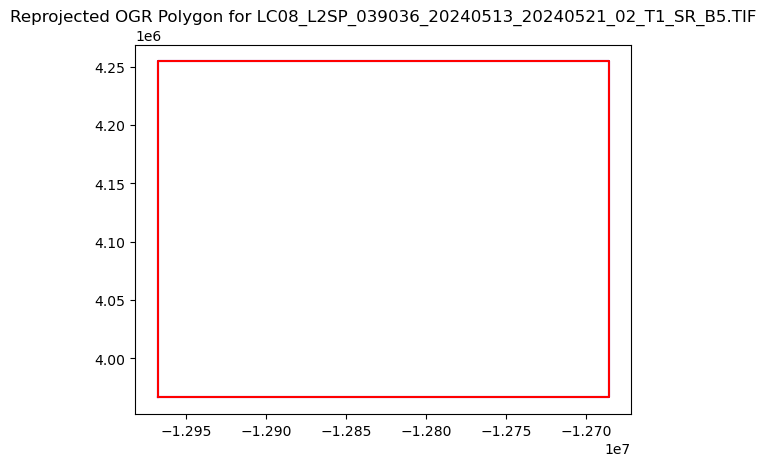

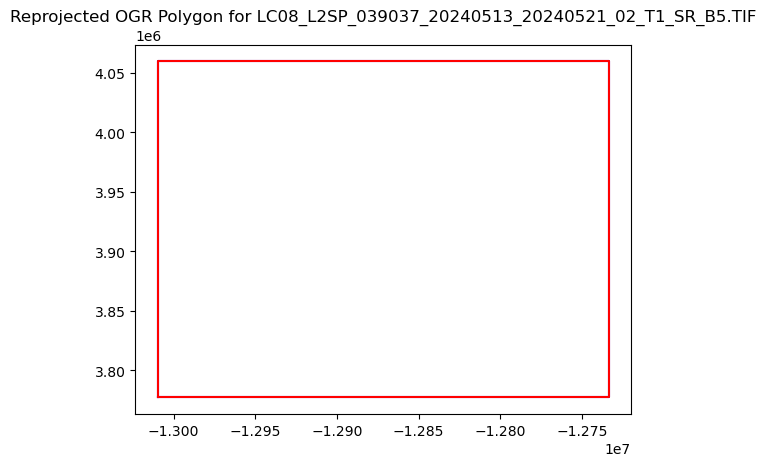

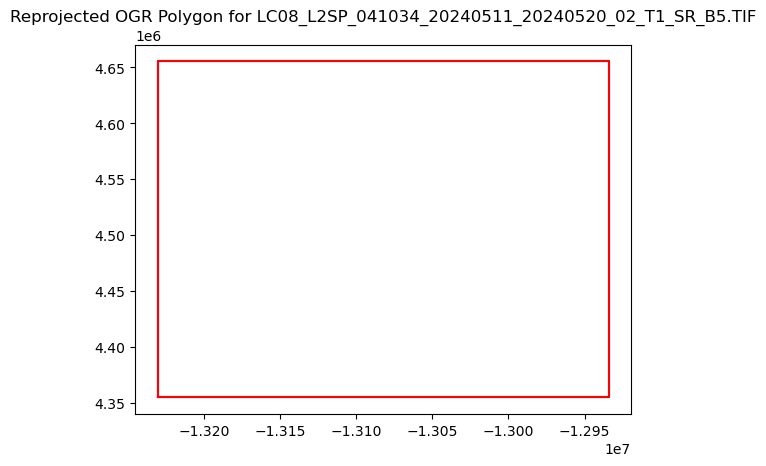

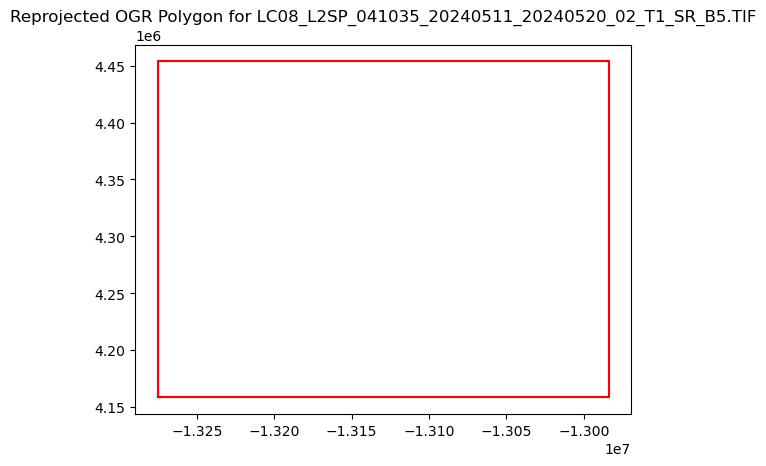

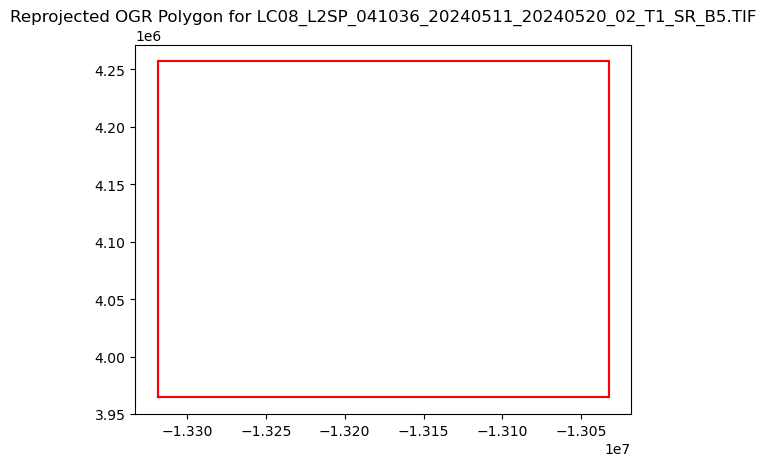

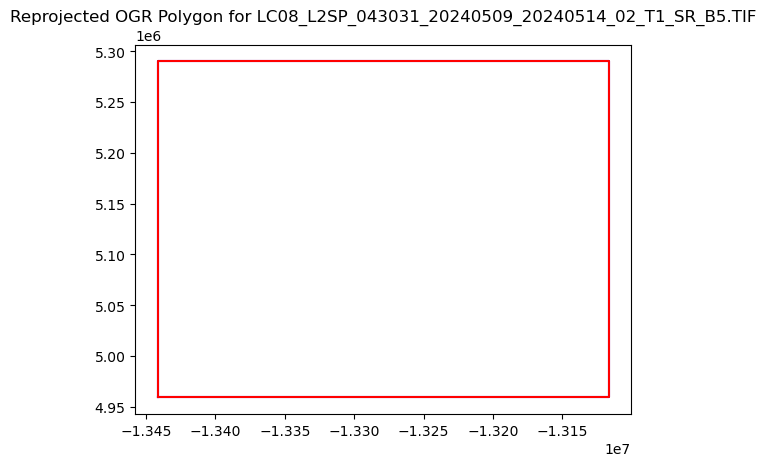

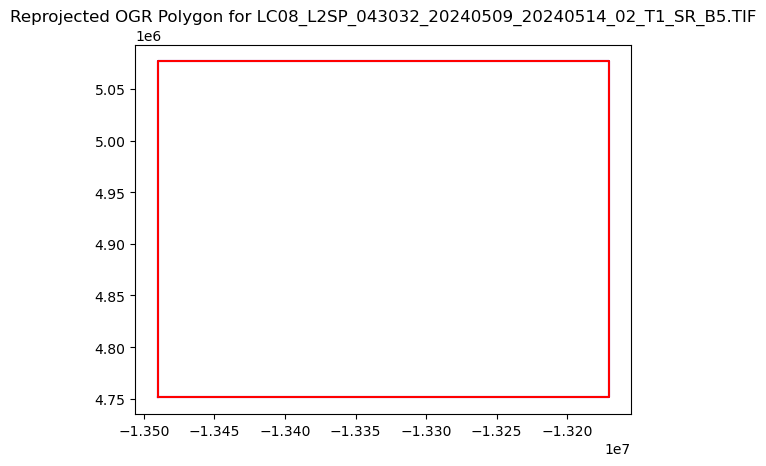

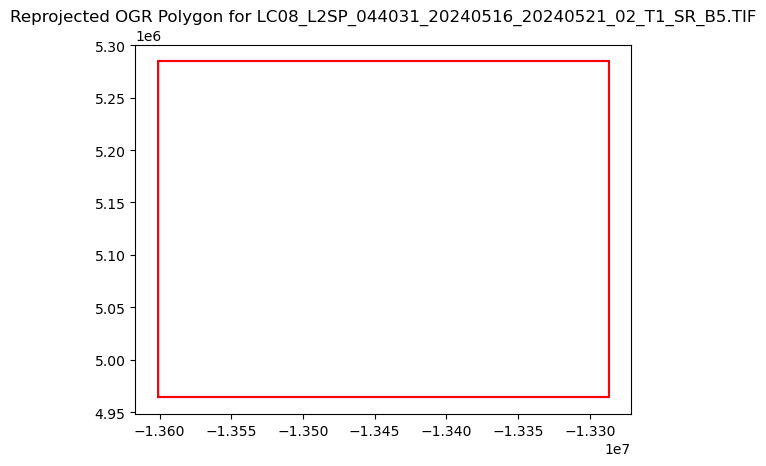

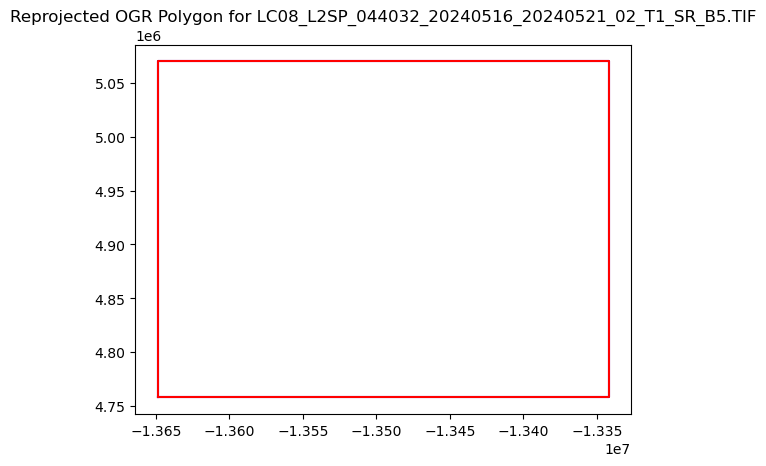

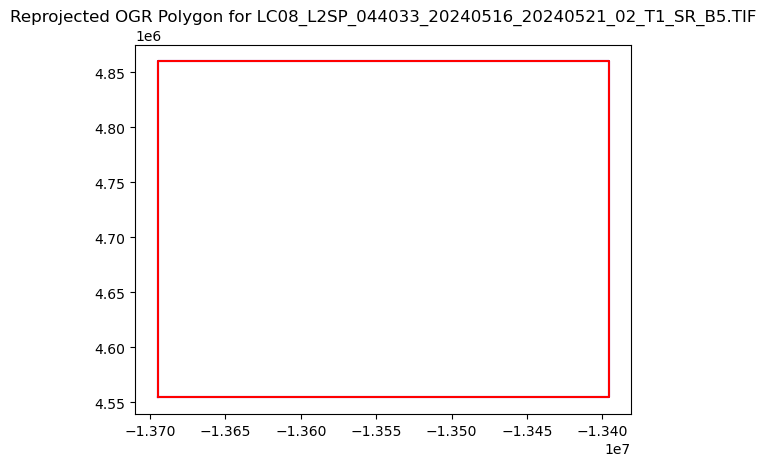

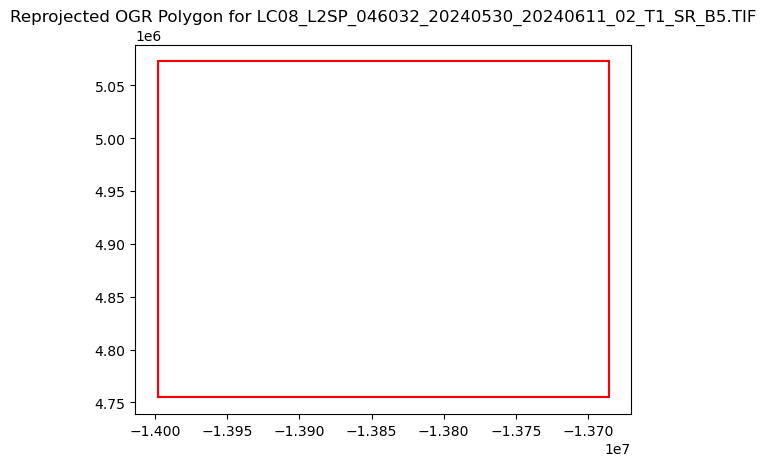

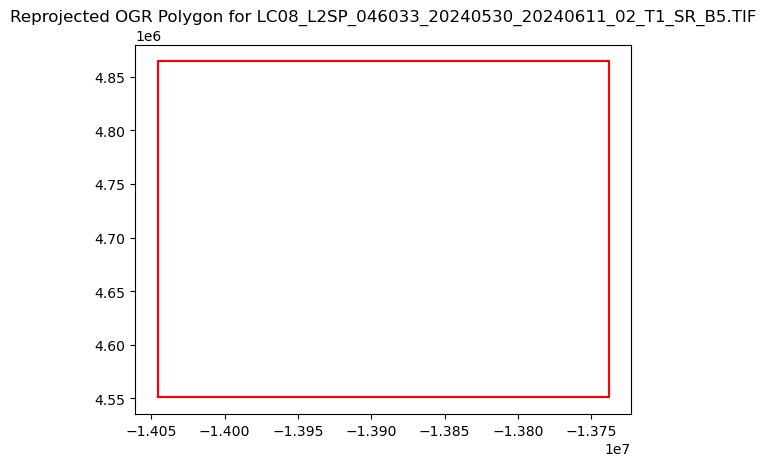

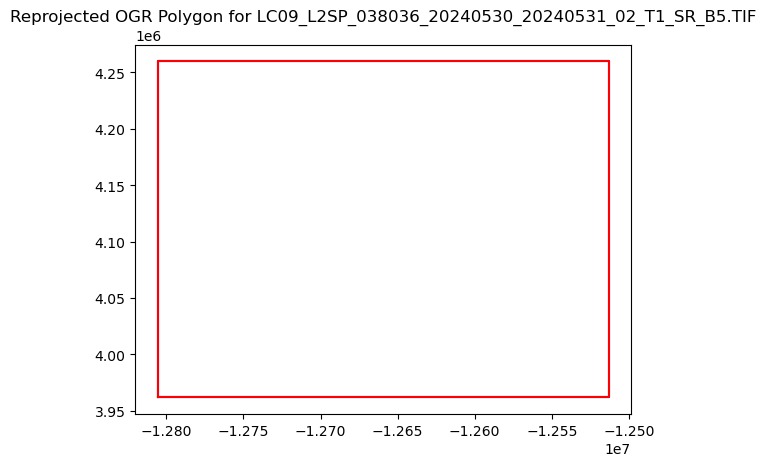

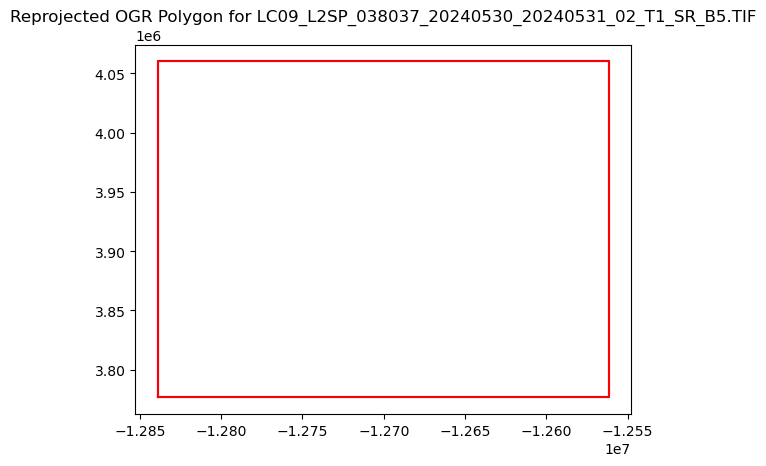

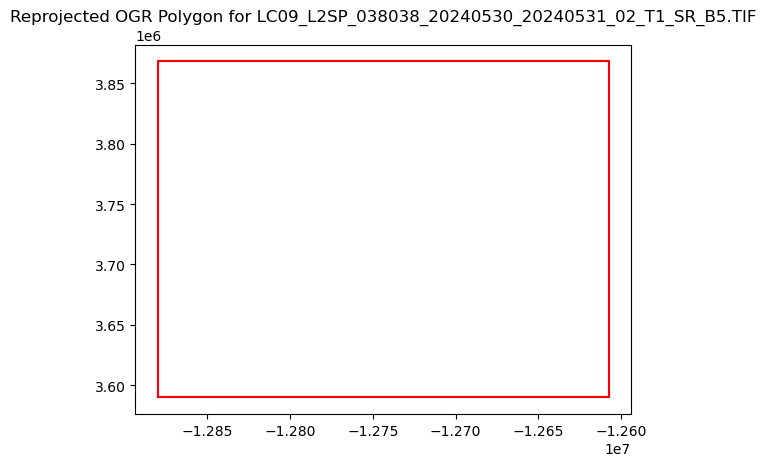

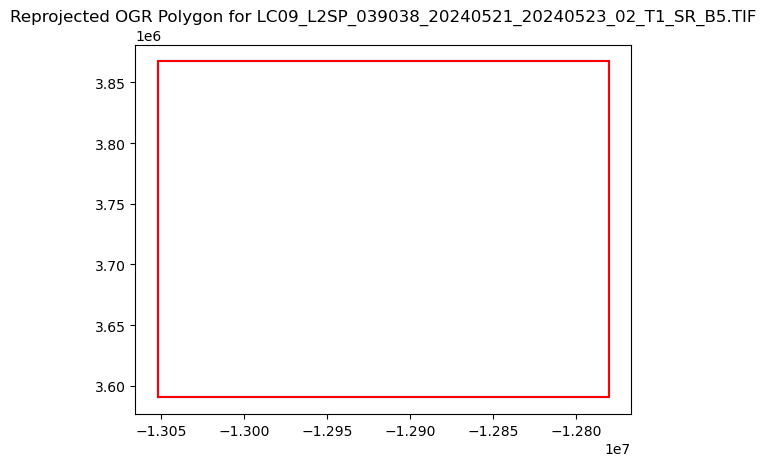

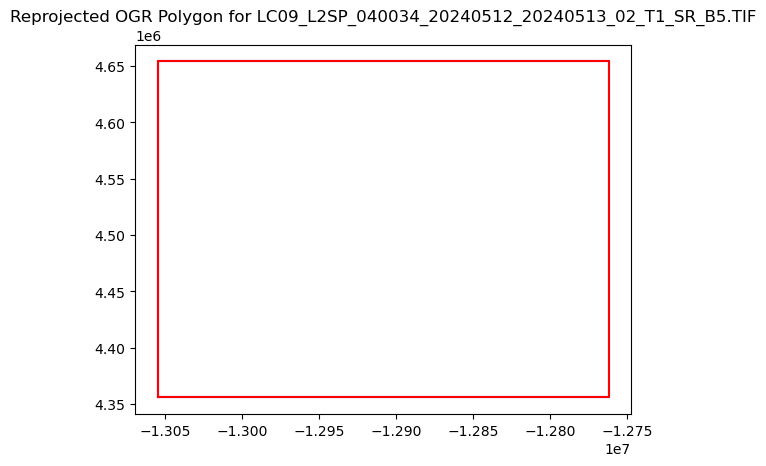

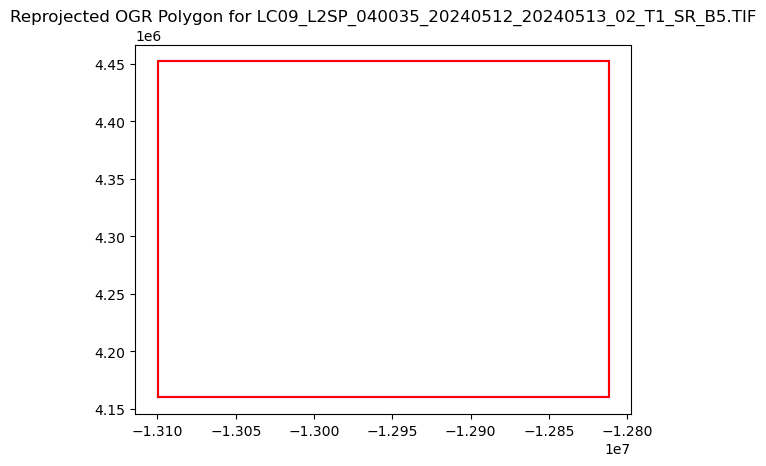

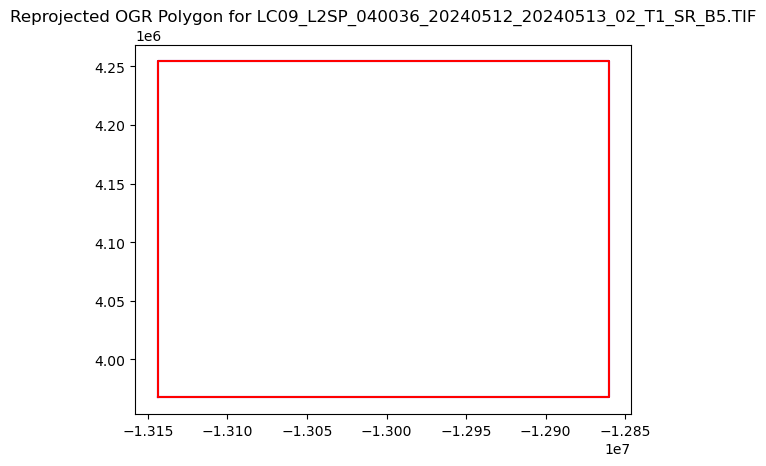

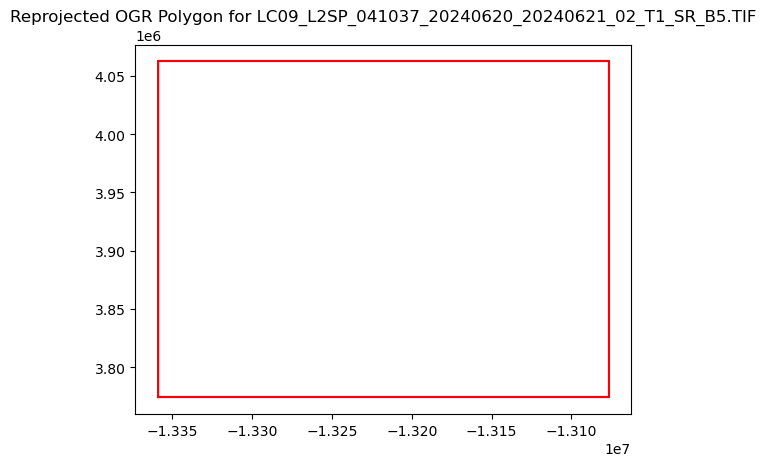

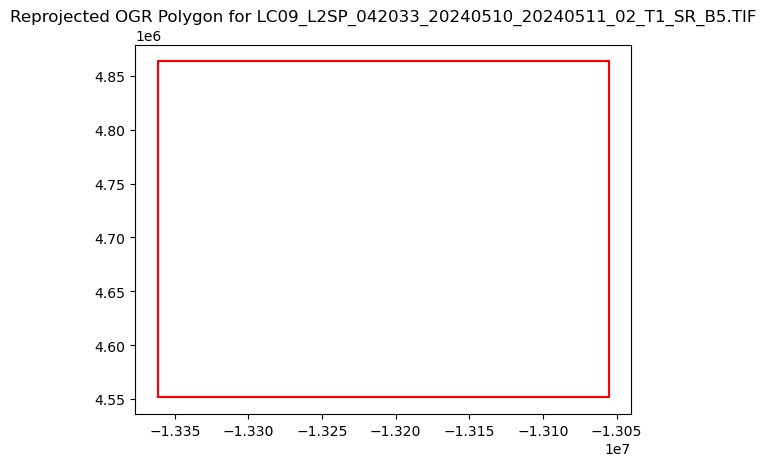

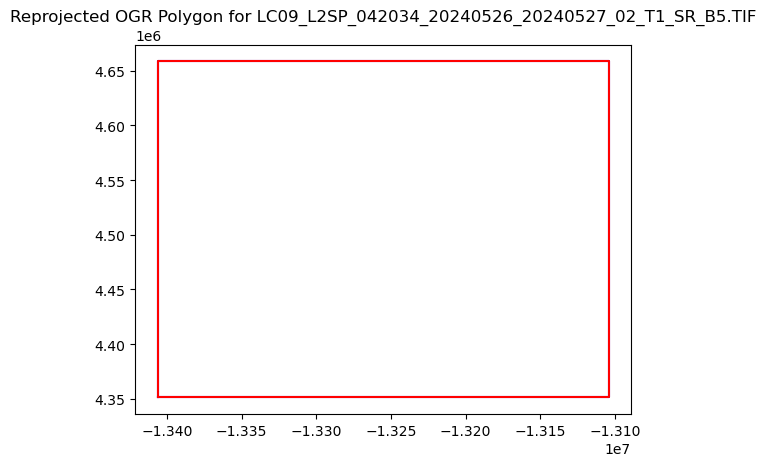

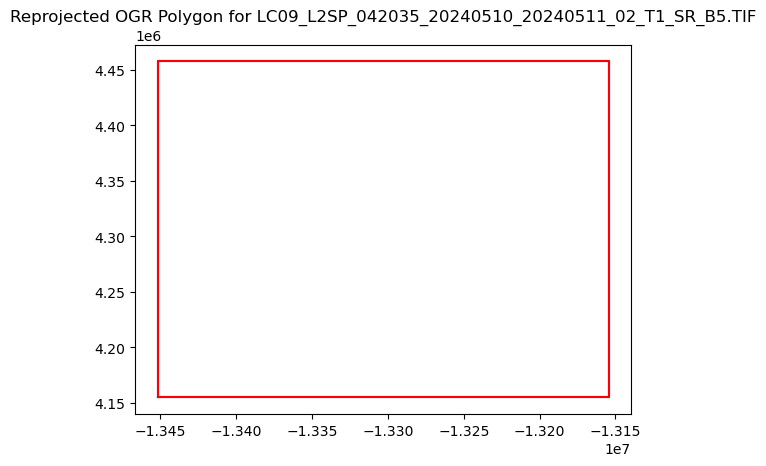

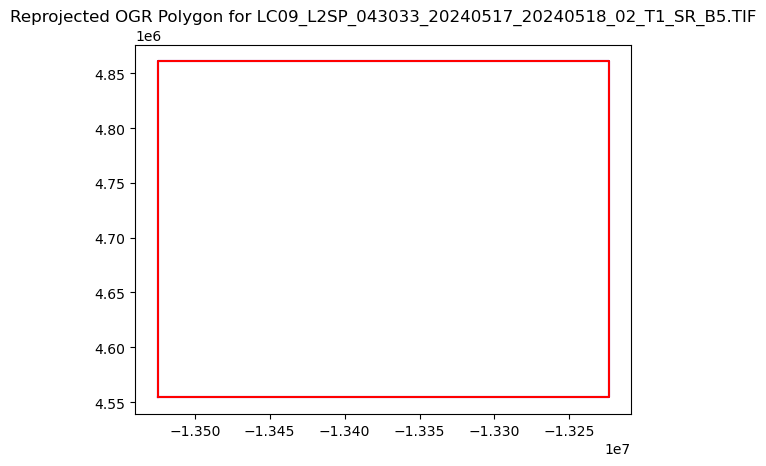

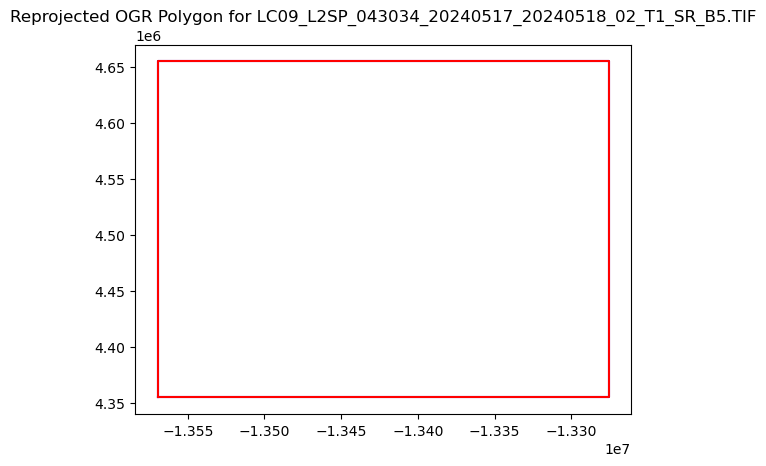

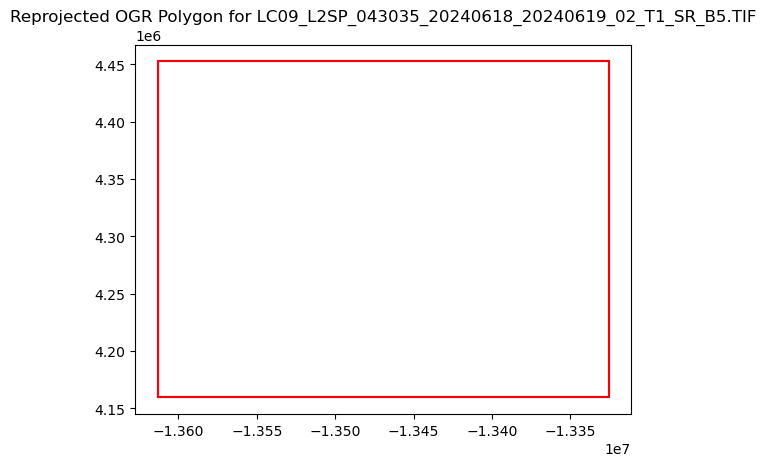

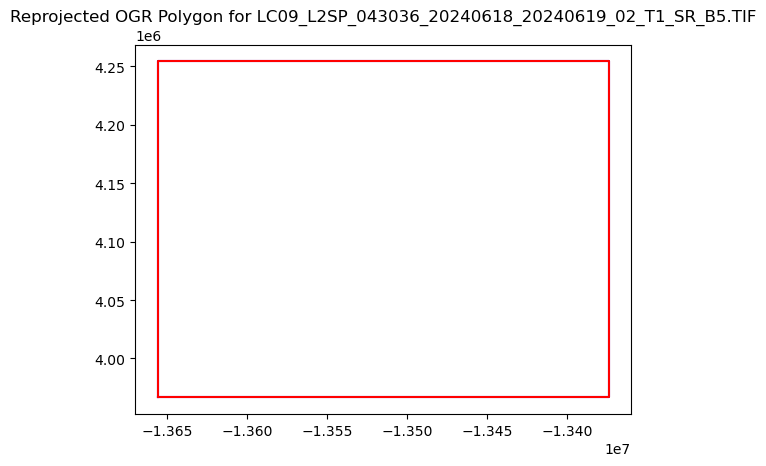

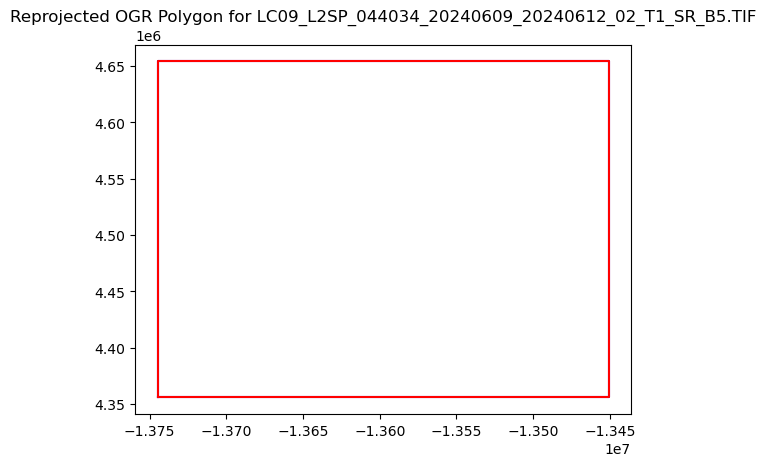

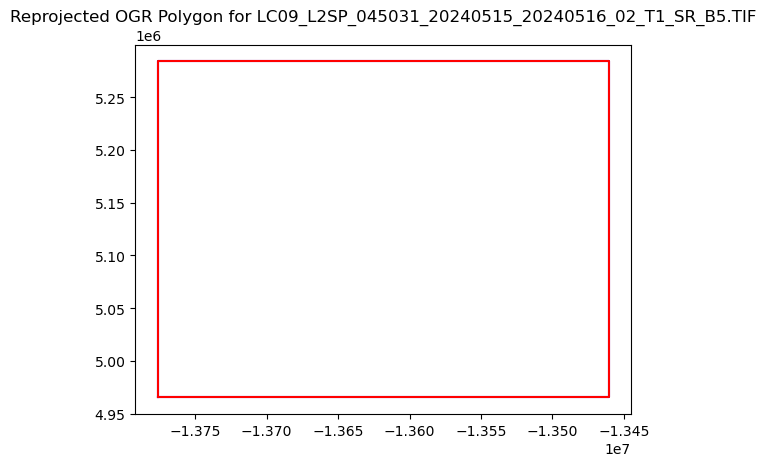

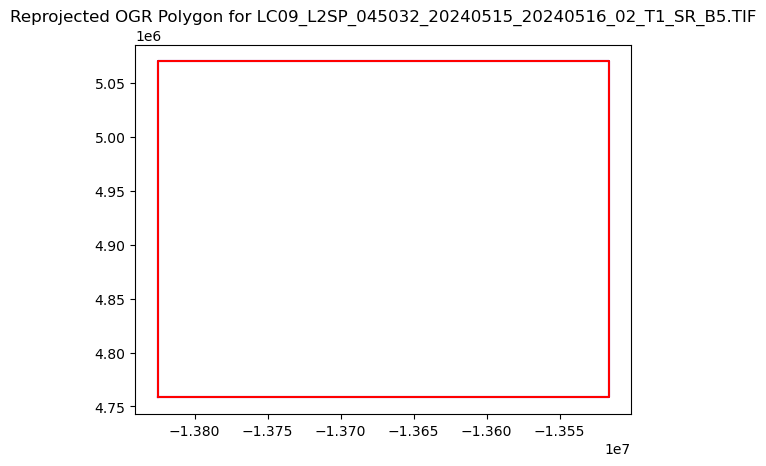

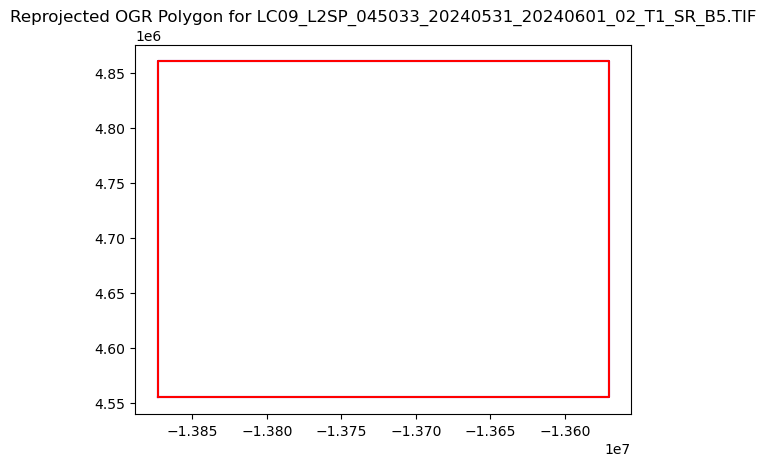

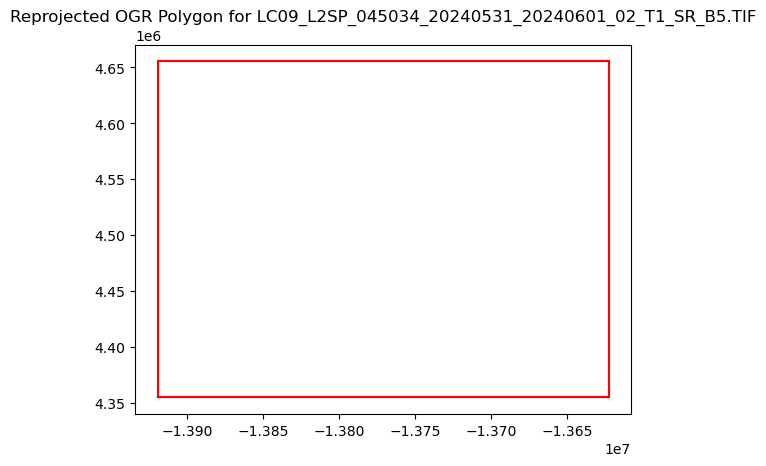

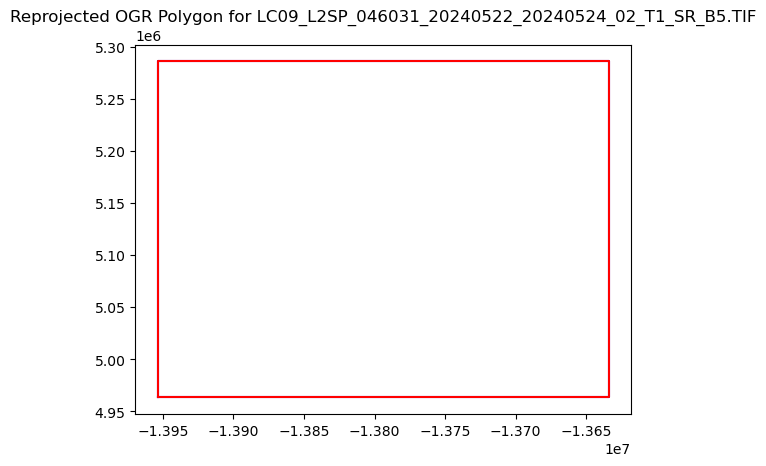

In [81]:
# Loop through all .tiff files in the folder
for filename in os.listdir(tif_folder):
#filename = "LC08_L2SP_039035_20240513_20240521_02_T1_SR_B5.TIF"
    if filename.endswith('.TIF'):
        filepath = os.path.join(tif_folder, filename)
                                                                                                                                                #print(f"Opening '{filepath}'...")
        with rasterio.open(filepath) as src:
            src_crs = src.crs                                                                 # Get the CRS and bounds of the raster file
            minx, miny, maxx, maxy = transform_bounds(src_crs, target_crs, *src.bounds)       # Convert raster bounds to match GeoDataFrame CRS
    
                                                                                                                                                #print(f"minx={minx} miny={miny} maxx={maxx} maxy={maxy}")
            
                                                                                                                                                # Create the reprojected polygon
                                                                                                                                                #raster_box = Polygon([(minx, miny), (maxx, miny), (maxx, maxy), (minx, maxy)])
                                                                                                                                                #ax = plot_polygon(raster_box, title=f"Reprojected Polygon for {filename}")
            raster_box_ogr = create_ogr_geometry(minx, miny, maxx, maxy)                      # Create OGR geometry from the reprojected bounds
    
                                                                                                                                                #print(f"raster_box_ogr={raster_box_ogr}")
            tiles.append(raster_box_ogr)                                                      # Add the reprojected OGR geometry (representing the bounding box of the raster file) to the list of tiles
    
                                                                                                                                                #print(f"tiles={len(tiles)}")
            
                                                                                                                                                # Plot the reprojected polygon
                                                                                                                                                #plot_polygon(Polygon(raster_box_ogr.GetBoundary().GetPoints()), title=f"Reprojected OGR Polygon for {filename}", ax=ax, color='red')
                                                                                                                                                #print(raster_box_ogr, "\n")

In [82]:
# Function to check for intersection between bounding boxes
def check_intersection(bbox, tile_geom): 
    minx, miny, maxx, maxy = bbox.minx, bbox.miny, bbox.maxx, bbox.maxy          # Extract the minimum and maximum x and y coordinates from the bounding box
    bbox_geom = create_ogr_geometry(minx, miny, maxx, maxy)                      # Create an OGR geometry object (polygon) from the bounding box coordinates
                                                                                                                                # Plot the polygons being checked for intersection
                                                                                                                                #fig, ax = plt.subplots()
                                                                                                                                #plot_polygon(Polygon([(bbox.minx, bbox.miny), (bbox.maxx, bbox.miny), (bbox.maxx, bbox.maxy), (bbox.minx, bbox.maxy)]), title="Intersection Check", ax=ax, color='green')
                                                                                                                                #plot_polygon(Polygon(tile_geom.GetBoundary().GetPoints()), ax=ax, color='red')
                                                                                                                                #plt.show()
                                                                                                                                # Check if the created OGR geometry intersects with the provided tile geometry
    return bbox_geom.Intersects(tile_geom)

In [83]:
# List to store intersecting bounding boxes
intersections = []
print(f"total bounding_boxes size={len(bounding_boxes)}")
print(f"total tiles size={len(tiles)}")
print(f"total iterations={len(bounding_boxes) * len(tiles)}")

# Check each bounding box from the GeoDataFrame against each tile's bounding box

for bbox in bounding_boxes.itertuples():                    # Loop through each bounding box in the GeoDataFrame's bounding boxes https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.itertuples.html
    for tile_bbox in tiles:                                 # Loop through each tile's bounding box in the list of tiles
                                                                                                #print(f"Checking intersection between bounding box {bbox} and tile {tile_bbox}")
        if check_intersection(bbox, tile_bbox):
            intersections.append(bbox)
            print(f"Intersection found: {bbox}")

total bounding_boxes size=6839
total tiles size=34
total iterations=232526
Intersection found: Pandas(Index=0, minx=-13608044.4142, miny=4545688.5176, maxx=-13604853.535, maxy=4547326.915)
Intersection found: Pandas(Index=1, minx=-13613560.8219, miny=4547254.275, maxx=-13608044.4142, maxy=4548298.1155)
Intersection found: Pandas(Index=2, minx=-13613427.6397, miny=4548276.164, maxx=-13613240.2938, maxy=4549615.1257)
Intersection found: Pandas(Index=3, minx=-13613131.6347, miny=4549619.4221, maxx=-13611729.0587, maxy=4550723.9106)
Intersection found: Pandas(Index=4, minx=-13000831.3951, miny=3963887.9878, maxx=-12981788.3313, maxy=3989231.9056)
Intersection found: Pandas(Index=4, minx=-13000831.3951, miny=3963887.9878, maxx=-12981788.3313, maxy=3989231.9056)
Intersection found: Pandas(Index=5, minx=-13133043.9153, miny=4004418.2136, maxx=-13132157.2148, maxy=4007033.6683)
Intersection found: Pandas(Index=5, minx=-13133043.9153, miny=4004418.2136, maxx=-13132157.2148, maxy=4007033.6683)
I

In [84]:
# Write the intersecting bounding boxes to a file
output_file = 'intersecting_bounding_boxes.csv'
with open(output_file, 'w') as f:
    for bbox in intersections:                               # Instead of a for loop just write out intersections
        f.write(f'{bbox},\n')                                # The index = index in the geodataframe